In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

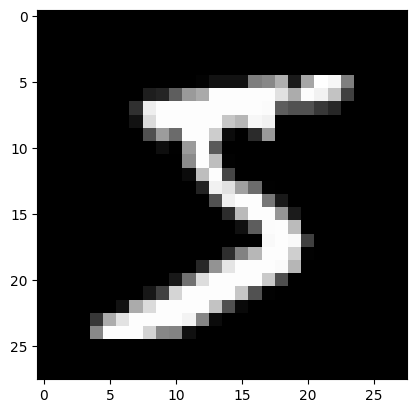

In [24]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [25]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [26]:
print("X_train shape", x_train.shape)

X_train shape (60000, 28, 28)


In [27]:
print("y_train shape", y_train.shape)

y_train shape (60000,)


In [28]:
print("X_test shape", x_test.shape)

X_test shape (10000, 28, 28)


In [29]:
print("y_test shape", y_test.shape)

y_test shape (10000,)


In [30]:
x_train = x_train.reshape(60000, 784)

In [31]:
x_test = x_test.reshape(10000, 784)

In [32]:
x_train = x_train.astype('float32')

In [33]:
x_test = x_test.astype('float32')

In [34]:
x_train /= 255

In [35]:
x_test /= 255

In [36]:
num_classes = 10

In [37]:
y_train = np.eye(num_classes)[y_train]

In [38]:
y_test = np.eye(num_classes)[y_test]

In [39]:
model = Sequential()

In [40]:
model.add(Dense(512, activation='relu', input_shape=(784,)))

In [41]:
model.add(Dropout(0.2))

In [42]:
model.add(Dense(512, activation='relu'))

In [43]:
model.add(Dropout(0.2))

In [44]:
model.add(Dense(num_classes, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [46]:
batch_size = 128

In [47]:
epochs = 20

In [48]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8549 - loss: 0.4614 - val_accuracy: 0.9681 - val_loss: 0.1008
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9665 - loss: 0.1105 - val_accuracy: 0.9738 - val_loss: 0.0875
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9774 - loss: 0.0729 - val_accuracy: 0.9744 - val_loss: 0.0837
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9826 - loss: 0.0561 - val_accuracy: 0.9801 - val_loss: 0.0699
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9856 - loss: 0.0467 - val_accuracy: 0.9776 - val_loss: 0.0809
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9809 - val_loss: 0.0711
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9898 - loss: 0.0316 - val_accuracy: 0.9825 - val_loss: 0.0669
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9906 - loss: 0.0288 - val_accuracy: 0.

In [49]:
score = model.evaluate(x_test, y_test, verbose=0)

In [50]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08066178858280182
Test accuracy: 0.9840999841690063
